<a href="https://colab.research.google.com/github/GoelBiju/Cotton-Disease-Identification/blob/main/notebooks/PROJ518_Cotton_Disease_Identification_Baseline_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PROJ518 - Cotton Disease Identification
# Goel Biju

# TensorFlow version 2
%tensorflow_version 2.x

import tensorflow as tf
print("TensorFlow version: " + tf.__version__)
import os

# Find GPU device
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


# Importing the dataset (stored in Google Drive)
from google.colab import drive

import cv2
from matplotlib import pyplot as plt

import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.metrics import Precision, Recall, BinaryAccuracy

import shutil


# Fix random seed for reproducibility?
# np.random.seed(9)

TensorFlow version: 2.8.2
Found GPU at: /device:GPU:0


healthy
leaf_curl


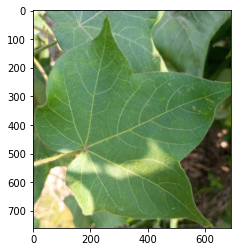

In [ ]:
drive.mount("/content/drive", force_remount=True)

# !ls "/content/drive/MyDrive/Cotton Dataset/data"
data_dir = "/content/drive/MyDrive/Cotton Dataset/data"

for image_class in os.listdir(data_dir):
  print(image_class)

img = cv2.imread(os.path.join(data_dir, 'healthy', 'Copy of IMG_20210927_132155_103.jpg'))
img.shape

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Found 226 files belonging to 2 classes.


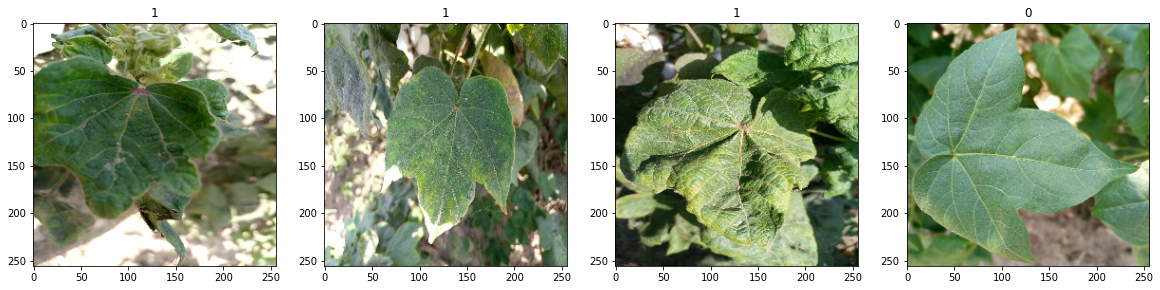

In [ ]:
# Load in data
data = tf.keras.utils.image_dataset_from_directory(data_dir)

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# Scale the data
data = data.map(lambda x, y: (x / 255, y))

data.as_numpy_iterator().next()

(array([[[[3.44607830e-01, 3.56249988e-01, 2.99448520e-01],
          [3.55392158e-01, 3.67156863e-01, 3.24019611e-01],
          [3.81372541e-01, 4.04901952e-01, 3.57843131e-01],
          ...,
          [3.14093143e-01, 5.48406839e-01, 3.57230395e-01],
          [3.07291657e-01, 5.50428927e-01, 3.50428909e-01],
          [2.77634799e-01, 5.05698502e-01, 3.09313715e-01]],
 
         [[3.54350477e-01, 3.59497547e-01, 3.24448526e-01],
          [3.92708331e-01, 4.00551468e-01, 3.57414216e-01],
          [4.24693614e-01, 4.32536751e-01, 3.89399499e-01],
          ...,
          [3.72794122e-01, 6.19852960e-01, 4.04166669e-01],
          [3.09313715e-01, 5.44607818e-01, 3.40686262e-01],
          [4.05759811e-01, 6.09987736e-01, 3.99019599e-01]],
 
         [[3.65441173e-01, 3.68137240e-01, 3.42156857e-01],
          [4.07107830e-01, 4.11029398e-01, 3.79656851e-01],
          [4.20159310e-01, 4.31924015e-01, 3.96629900e-01],
          ...,
          [3.44852954e-01, 5.84068656e-01, 3.5269

In [ ]:
# Split Data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

train

In [ ]:
# Create the architecture for the deep learning model


# Clear any previous models created to prevent 
# adding unnecessary layers when testing again
tf.keras.backend.clear_session()

# Initial sequential
model = Sequential()


model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Show a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
# Train the model

logdir='logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 30s 3s/step - loss: 0.6945 - accuracy: 0.5125 - val_loss: 0.6694 - val_accuracy: 0.9062
Epoch 2/20
5/5 [==============================] - 17s 3s/step - loss: 0.6475 - accuracy: 0.6687 - val_loss: 0.5644 - val_accuracy: 0.8125
Epoch 3/20
5/5 [==============================] - 17s 3s/step - loss: 0.5679 - accuracy: 0.7188 - val_loss: 0.6073 - val_accuracy: 0.6250
Epoch 4/20
5/5 [==============================] - 17s 3s/step - loss: 0.4386 - accuracy: 0.8000 - val_loss: 0.2893 - val_accuracy: 0.9375
Epoch 5/20
5/5 [==============================] - 17s 3s/step - loss: 0.4347 - accuracy: 0.8125 - val_loss: 0.2978 - val_accuracy: 0.8438
Epoch 6/20
5/5 [==============================] - 17s 3s/step - loss: 0.3564 - accuracy: 0.8438 - val_loss: 0.3796 - val_accuracy: 0.8125
Epoch 7/20
5/5 [==============================] - 13s 2s/step - loss: 0.3218 - accuracy: 0.8625 - val_loss: 0.5453 - val_accuracy: 0.7500
Epoch 8/20
5/5 [==================

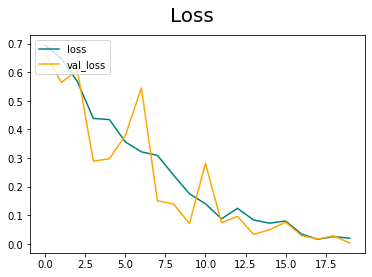

In [ ]:
# Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


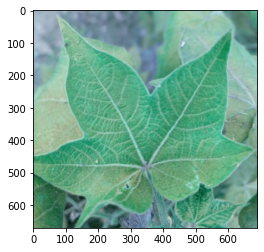

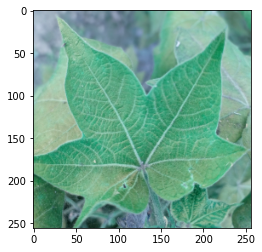

[[0.05789293]]
Predicted class is healthy leaf


In [ ]:
# Prediction on test dataset
test_dir = "/content/drive/MyDrive/Cotton Dataset/Original"

img = cv2.imread(os.path.join(test_dir, 'Leave curl virus', 'Test Healthy Leaves',
                              'IMG_20210929_131914_515.jpg'))
img.shape
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))
print(yhat)

if yhat > 0.5: 
    print(f'Predicted class is leaf curl virus')
else:
    print(f'Predicted class is healthy leaf')

In [ ]:
# Save the model

# model.save(os.path.join(data_dir, 'baseline-1.h5'))
shutil.copy('models/baseline-1.h5', data_dir)

'/content/drive/MyDrive/Cotton Dataset/Original/baseline-1.h5'

In [ ]:
# Unmount the drive
drive.flush_and_unmount()